# Comparing my model Fake news detection 

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import zipfile
from zipfile import ZipFile

### Comparing Fake News Classifiers


I wrote a longer explanation of the methodology and approach for detecting fake news using scikit-learn (and you can find the
notebook on my GitHub). 
.

In this notebook, I wanted to compare some of the features learned by each classifier to see if there was overlap or 
patterns in the features

In [6]:
zf =zipfile.ZipFile('fdata.zip')
fn = pd.read_csv(zf.open('fake_or_real_news.csv'))

In [7]:
y = fn.label

In [9]:
fn = fn.drop('label', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(fn['text'], y, test_size=0.33, random_state=53)

In [11]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [12]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

### Training models

Now I have my vectors and I can create my different classifiers. In my bak model I noted that there is definitely noise in the 
dataset, so we should expect to see that reflected in our features. Normally, I would spend some time cleaning the data, 
but this was a small proof of concept and investigation. I hoped merely that at least one model would be able to correct 
for the noise.

I will compare the following models (and training data):

multinomialNB with counts (sgd_count_clf)

multinomialNB with tf-idf (mn_tfidf_clf)

passive aggressive with tf-idf (pa_tfidf_clf)

linear svc with tf-idf (svc_tfidf_clf)

linear sgd with tf-idf (sgd_tfidf_clf)

For speed and clarity, I am primarily not doing parameter tuning, although this could be added as a step 
(perhaps in a scikit-learn Pipeline)

In [13]:
mn_count_clf = MultinomialNB(alpha=0.1)

In [14]:

mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.893


In [15]:
mn_tfidf_clf = MultinomialNB(alpha=0.1)

In [16]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.898


In [17]:
pa_tfidf_clf = PassiveAggressiveClassifier(n_iter=50)

In [18]:

pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.935


In [19]:
svc_tfidf_clf = LinearSVC()

In [20]:
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.936


In [21]:
sgd_tfidf_clf = SGDClassifier()

In [22]:
sgd_tfidf_clf.fit(tfidf_train, y_train)
pred = sgd_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.938


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [23]:
sgd_tfidf_clf.decision_function?

In [24]:
mn_count_clf.predict_proba?

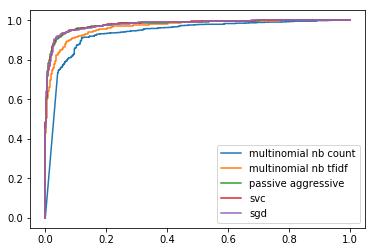

In [25]:
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'multinomial nb count'),
                     (mn_tfidf_clf, 'multinomial nb tfidf'),
                     (pa_tfidf_clf, 'passive aggressive'),
                     (svc_tfidf_clf, 'svc'),
                     (sgd_tfidf_clf, 'sgd')]:
    if 'count' in name:
        pred = model.predict_proba(count_test)[:,1]
    elif 'multinomial' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    else: 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred, pos_label='REAL')
    plt.plot(fpr,tpr,label="{}".format(name))

plt.legend(loc=0)